# Autoencoders (Anomaly Detection)
* Step 2: Preprocess the Data
* Step 3: Split the Data
* Step 4: Build the Autoencoder Model
* Step 5: Train the Autoencoder
* Step 6: Analyze Reconstruction Errors
* Step 7: Set Threshold for Anomaly Detection
* Step 8: Visualize the Results


In [16]:
# Step 1: Create a Simple Dataset with Outliers
# Step 2: Preprocess the Data
# Step 3: Split the Data
# Step 4: Build the Autoencoder Model
# Step 5: Train the Autoencoder
# Step 6: Analyze Reconstruction Errors
# Step 7: Set Threshold for Anomaly Detection
# Step 8: Visualize the Results

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Step 1: Create a Simple Dataset with Outliers
np.random.seed(42)

# Generate normal data (1000 samples, 2 features)
data_normal = np.random.normal(0, 1, (1000, 2))

# Generate outliers (50 samples, 2 features)
data_outliers = np.random.uniform(-10, 10, (50, 2))
# Combine normal data and outliers
data = np.vstack([data_normal, data_outliers])
labels = np.hstack([np.zeros(1000), np.ones(50)])  # 0: normal, 1: outlier

In [19]:
df = pd.DataFrame(data,labels)
df = df.rename(columns={0: 'Feature 1', 1: 'Feature 2'})
df = df.reset_index()
df = df.rename(columns={'index': 'Label'})
df.head()

,Label,Feature 1,Feature 2
0,0.0,0.496714,-0.138264
1,0.0,0.647689,1.523030
2,0.0,-0.234153,-0.234137
3,0.0,1.579213,0.767435
4,0.0,-0.469474,0.542560


from matplotlib import pyplot as plt
_df_0['Feature 1'].plot(kind='hist', bins=20, title='Feature 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Feature 2'].plot(kind='hist', bins=20, title='Feature 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Feature 1', y='Feature 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Label']
  ys = series['Feature 1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('Feature 1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Label']
  ys = series['Feature 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('Feature 2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Label'}, axis=1)
              .sort_values('Label', ascending=True))
  xs = counted['Label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Feature 1'].plot(kind='line', figsize=(8, 4), title='Feature 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Feature 2'].plot(kind='line', figsize=(8, 4), title='Feature 2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
# Step 2: Preprocess the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

In [22]:
# Step 4: Build the Autoencoder Model
input_dim = X_train.shape[1]
encoding_dim = 2

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [23]:
# Step 5: Train the Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=0)

In [24]:
# Step 6: Analyze Reconstruction Errors
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - reconstructed), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [25]:
# Step 7: Set Threshold for Anomaly Detection
threshold = np.percentile(reconstruction_error, 95)

# Detect Anomalies
anomalies = reconstruction_error > threshold

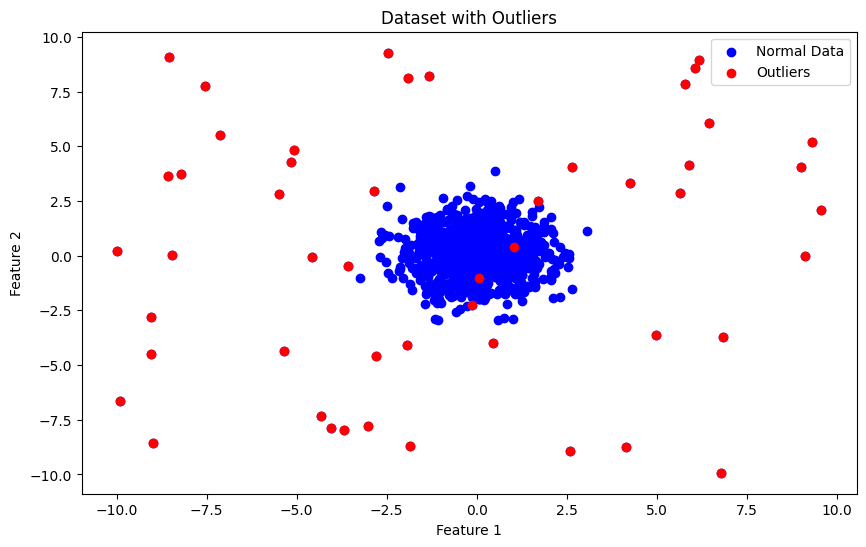

In [27]:
# Step 8: Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Normal Data')
plt.scatter(data_outliers[:, 0], data_outliers[:, 1], c='red', label='Outliers')
plt.title("Dataset with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

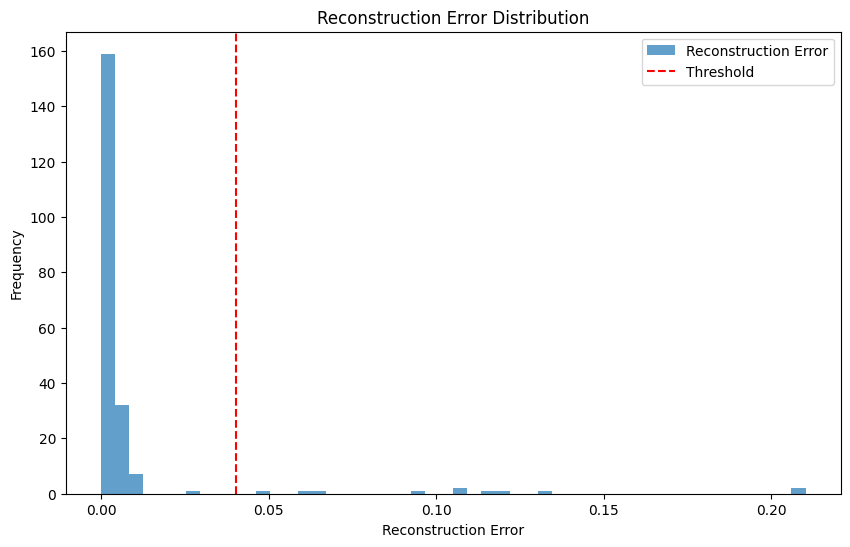

Number of anomalies detected: 11


In [28]:
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.7, label='Reconstruction Error')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Anomalies Detected
print(f"Number of anomalies detected: {np.sum(anomalies)}")